In [1]:
#importing the needed librariries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import re
import itertools

In [ ]:
# downloading the stopwords from the nltk library
import nltk
nltk.download('stopwords')

In [2]:
#reading the dataset to pandas
news_dataset=pd.read_csv('D:/semester 2/project id1110 s2/train.csv')
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
#checking the dimension of the data set
news_dataset.shape

(20800, 5)

In [5]:
#finding the sum of blank vvalues in the data set
news_dataset.isnull().sum()
# filling the space with empty set 
news_dataset = news_dataset.fillna('')

In [6]:
# mixing the author and title part
news_dataset['content'] = news_dataset['author']+' '+news_dataset['title']

In [9]:
# defining a function for the preproccesing of the text
port_stem = PorterStemmer()
def preprocess(content):
    content = re.sub('[^a-zA-Z]',' ',content)
    content = content.lower()
    content = content.split()
    content = [port_stem.stem(word) for word in content if not word in stopwords.words('english')]
    content = ' '.join(content)
    return content
print('1')

1


In [10]:
news_dataset['content'] = news_dataset['content'].apply(preprocess)

In [ ]:
X = news_dataset['content'].values
Y = news_dataset['label'].values
print('1')

1


In [14]:
print(X)

print(Y)

Y.shape
print('1')

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']
[1 0 1 ... 0 1 1]
1


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
print('1')

1


In [16]:
X = vectorizer.transform(X)
print('1')

1


In [17]:

from sklearn import metrics
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print('1')

1


In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)
print('1')

NameError: name 'data' is not defined

In [27]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe= Pipeline([
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])

In [28]:
model=pipe.fit(X_train,Y_train)

In [32]:
prediction = model.predict(X_test)
print("accuracy: ",accuracy_score(Y_test, prediction)*100,)

accuracy:  97.16346153846153


Confusion matrix, without normalization


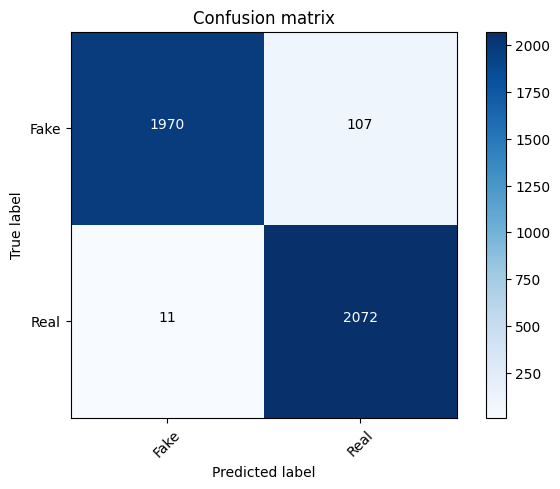

In [33]:
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])